In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

filename = "job_hunting.xlsx"
# 1ファイル内の全シートを読み込み
with pd.ExcelFile(filename) as xls:
    df_by_company = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# 表示する行数の最大値をNoneに設定（全ての行を表示）
pd.set_option('display.max_rows', None)

# 表示する列数の最大値をNoneに設定（全ての列を表示）
pd.set_option('display.max_columns', None)

# 列の幅制限を解除（長いテキストも省略せず表示）
pd.set_option('display.max_colwidth', None)

# 折り返し表示を有効にする（オプション）
pd.set_option('display.expand_frame_repr', False)


In [3]:
university_groups = {
    "東京一工": [
        "東京大学",      # 東大（理系・文系の最高峰）
        "京都大学",      # 京大（東大と並ぶ総合大学）
        "一橋大学",      # 一橋（文系、特に経済・商学で有名）
        "東京工業大学",   # 東工大（理系最難関の一つ）
        "東京医科歯科大学" # 現　東工大
    ],
    "旧帝": [
        "東北大学",
        "九州大学",
        "北海道大学",
        "大阪大学",
        "名古屋大学",
        "神戸大学", # 旧帝大ではないが、旧帝大に準じる大学
        "大阪公立大",
    ],
    "筑横千首": [
        "筑波大学",      # 筑（ちく）
        "横浜国立大学",  # 横（よこ）
        "千葉大学",      # 千（せん）
        "首都東京大学",   # 首（しゅ）
        "東京都立大学",   # 現　首都東京大学
        "東京外国語大学",
    ],
    "電農名繊": [
        "電気通信大学",  # 電（でん）
        "東京農工大学",  # 農（のう）
        "名古屋工業大学", # 名（めい）
        "京都工芸繊維大学" # 繊（せん）
    ],
    "早慶上理": [
        "早稲田大学",    # 早（そう）
        "慶應義塾大学",  # 慶（けい）
        "上智大学",      # 上（じょう）
        "東京理科大学",   # 理（り）
        "国際基督教大学"
    ],
    # "SMART": [
    #     "上智大学",      # S（Sophia）
    #     "明治大学",      # M（Meiji）
    #     "青山学院大学",   # A（Aoyama）
    #     "立教大学",      # R（Rikkyo）
    #     "東京理科大学"    # T（Tokyo University of Science）
    # ],
    "GMARCH": [
        "学習院大学",  # G
        "明治大学",    # M
        "青山学院大学", # A
        "立教大学",    # R
        "中央大学",    # C
        "法政大学"     # H
    ],
    "関関同立": [
        "関西大学",      # 関（かん）
        "関西学院大学",  # 関（かん）
        "同志社大学",    # 同（どう）
        "立命館大学"     # 立（りつ）
    ]
}

univ_names = [univ for lst in university_groups.values() for univ in lst]
univ_names

['東京大学',
 '京都大学',
 '一橋大学',
 '東京工業大学',
 '東京医科歯科大学',
 '東北大学',
 '九州大学',
 '北海道大学',
 '大阪大学',
 '名古屋大学',
 '神戸大学',
 '大阪公立大',
 '筑波大学',
 '横浜国立大学',
 '千葉大学',
 '首都東京大学',
 '東京都立大学',
 '東京外国語大学',
 '電気通信大学',
 '東京農工大学',
 '名古屋工業大学',
 '京都工芸繊維大学',
 '早稲田大学',
 '慶應義塾大学',
 '上智大学',
 '東京理科大学',
 '国際基督教大学',
 '学習院大学',
 '明治大学',
 '青山学院大学',
 '立教大学',
 '中央大学',
 '法政大学',
 '関西大学',
 '関西学院大学',
 '同志社大学',
 '立命館大学']

In [4]:
excel_columns_with_index = ['index', '順位', '設置','大学名', '所在地', '就職者数']
excel_columns = ['順位', '設置','大学名', '所在地', '就職者数']
for key, df in df_by_company.items():
    # print(len(df.columns))
    # print(df.columns)
    if len(df.columns) == 6:
        df.columns = excel_columns_with_index
        df_by_company[key] = df.drop(columns=['index'], axis=1)
    else:
        df.columns = excel_columns
    # print(len(df_by_company[key].columns))

In [5]:
company_names = list(df_by_company.keys())

In [6]:
df_size = pd.DataFrame(index=univ_names)
print(df_size.index)

for company_name in company_names:
    company_series = pd.DataFrame(columns=[company_name])
    for univ_name in univ_names:
        size = df_by_company[company_name][df_by_company[company_name]['大学名'].str.contains(univ_name.replace('学', ''))]['就職者数']
        if len(size) == 0:
            continue
        company_series.loc[univ_name] = size.iat[0]
    df_size = df_size.join(company_series[company_name], how='outer')
df_size = df_size.dropna(how='all')
df_size = df_size.fillna(0)
df_size.head()

Index(['東京大学', '京都大学', '一橋大学', '東京工業大学', '東京医科歯科大学', '東北大学', '九州大学', '北海道大学',
       '大阪大学', '名古屋大学', '神戸大学', '大阪公立大', '筑波大学', '横浜国立大学', '千葉大学', '首都東京大学',
       '東京都立大学', '東京外国語大学', '電気通信大学', '東京農工大学', '名古屋工業大学', '京都工芸繊維大学', '早稲田大学',
       '慶應義塾大学', '上智大学', '東京理科大学', '国際基督教大学', '学習院大学', '明治大学', '青山学院大学',
       '立教大学', '中央大学', '法政大学', '関西大学', '関西学院大学', '同志社大学', '立命館大学'],
      dtype='object')


,三菱ＵＦＪ信託銀行,三井住友海上火災保険,大林組,神戸製鋼所,読売新聞社,味の素,森永乳業,日本経済新聞社,三菱電機,コナミグループ,伊藤園,双日,アクセンチュア,ＪＦＥグループ,九州電力,ＮＨＫ,ドコモグループ,鹿島,ＡＬＳＯＫ,ゆうちょ銀行,大和ハウス工業,ＢＩＰＲＯＧＹ,博報堂／博報堂ＤＹメディアパートナーズ,ＮＥＣ,ＮＴＴ西日本,竹中工務店,ホンダ,ＴＤＫ,テレビ東京,ＩＨＩ,清水建設,三井住友信託銀行,ＪＲ東海,野村総合研究所,東レ,小学館,かんぽ生命保険,アビームコンサルティング,塩野義製薬,キヤノン,丸紅,東芝,日本郵政,中部電力,毎日新聞社,ＮＴＴデータグループ,大成建設,デンソー,富士フイルム,三菱ＵＦＪ銀行,ＬＩＸＩＬ,レゾナック,シャープ,マツダ,日本製鉄,リコー,岡三証券,ＹＫＫ／ＹＫＫ ＡＰ,ＪＲ西日本,日本テレビ放送網,講談社,エーザイ,住友生命保険,テルモ,アコム,いすゞ自動車,良品計画,積水ハウス,サイバーエージェント,大塚商会,第一生命保険,東京電力,中外製薬,集英社,花王,クボタ,三菱商事,フジテレビジョン,ＰｗＣコンサルティング,ミネベアミツミ,関西電力,みずほフィナンシャルグループ,オリエンタルランド,商工組合中央金庫,電通,明治安田生命保険,損害保険ジャパン,野村不動産,東京エレクトロングループ,日揮ホールディングス,ニトリ,住友電気工業,ＥＮＥＯＳ,ＴＢＳテレビ,東京海上日動火災保険,東海東京フィナンシャル・ホールディングス,キユーピー,三菱ＵＦＪニコス,大塚製薬,三菱マテリアル,オービック,ローソン,セブン‐イレブン・ジャパン,パナソニック,日本生命保険,ヤマハ発動機,トヨタ自動車,ソニーグループ,三井住友銀行,タカラスタンダード,日立ソリューションズ,三井不動産,関西みらい銀行,ＪＲ東日本,日本航空,ＡＧＣ,ＪＴ,ＴＯＴＯ,あいおいニッセイ同和損害保険,リクルート,りそなグループ,明治グループ,日本銀行,ＮＴＴ東日本,ローム,戸田建設,セキスイハイムグループ,Ｓｋｙ,東北電力,村田製作所,野村証券,ＮＥＣソリューションイノベータ,トランスコスモス,住友商事,三井物産,エイチ・アイ・エス,ＳＭＢＣ日興証券,大阪ガス,川崎重工業,伊藤忠商事,日本通運,三井化学,ベネッセコーポレーション,横浜銀行,第一三共,キリン,デロイトトーマツコンサルティング,ＮＴＴ（持株会社）,日本ＩＢＭ,京都銀行,日産自動車,富士電機,豊田自動織機,ＪＴＢ,三菱地所,東京ガス,ＳＣＳＫ,旭化成グループ,ルネサスエレクトロニクス,サントリーグループ,ＴＩＳ,朝日新聞社,アステラス製薬,古河電気工業,日本郵便,メイテック,大日本印刷,長谷工コーポレーション,出光興産,ジェーシービー,ＴＯＰＰＡＮ,スズキ,三菱重工業,オリエントコーポレーション,アルファシステムズ,福岡銀行,三菱自動車工業,山崎製パン,大和証券,住友化学,アマゾンジャパン,ＥＹストラテジー・アンド・コンサルティング,京セラ,ＫＤＤＩ,ダイハツ工業,ＫＡＤＯＫＡＷＡ,青山商事,五洋建設,ＳＵＢＡＲＵ,セイコーエプソン,ファーストリテイリンググループ,ＬＩＮＥヤフー,楽天グループ,日東電工,コマツ,住友林業,千葉銀行グループ,富士ソフト,静岡銀行,東武トップツアーズ,積水化学工業,日立システムズ,インテック,富士通,日本政策金融公庫,三菱ＵＦＪモルガン・スタンレー証券,アイシン,キヤノンマーケティングジャパン,オリックス,キーエンス,セコム,全日本空輸,ソフトバンク,富士フイルムビジネスイノベーション,日立製作所,ダイキン工業,テレビ朝日
一橋大学,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,0.0,0.0,4.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,11.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,0.0,8.0,0.0,0.0,23.0,1.0,2.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,1.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,11.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
上智大学,5.0,7.0,0.0,0.0,4.0,0.0,1.0,6.0,14.0,7.0,2.0,9.0,31.0,0.0,0.0,12.0,18.0,0.0,0.0,2.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,14.0,0.0,4.0,2.0,4.0,1.0,0.0,0.0,20.0,0.0,0.0,3.0,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,2.0,0.0,12.0,2.0,0.0,17.0,1.0,2.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,1.0,0.0,9.0,0.0,0.0,11.0,14.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,20.0,16.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,4.0,2.0,4.0,8.0,0.0,0.0,5.0,7.0,0.0,2.0,0.0,0.0,3.0,16.0,0.0,26.0,0.0,10.0,0.0,0.0,4.0,3.0,3.0,4.0,2.0,0.0,7.0,4.0,3.0,0.0,1.0,0.0,0.0,6.0,0.0,2.0,6.0,9.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,8.0,0.0,9.0,6.0,0.0,14.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,3.0,18.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,0.0,1.0,7.0,0.0,17.0,13.0,2.0,21.0,5.0,0.0
中央大学,2.0,7.0,0.0,0.0,2.0,0.0,0.0,4.0,15.0,2.0,4.0,4.0,17.0,0.0,2.0,7.0,14.0,0.0,5.0,6.0,8.0,3.0,2.0,29.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,8.0,4.0,7.0,0.0,0.0,6.0,5.0,0.0,5.0,0.0,3.0,3.0,0.0,0.0,19.0,8.0,3.0,0.0,8.0,0.0,4.0,7.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0,1.0,4.0,3.0,0.0,7.0,8.0,10.0,9.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,4.0,17.0,1.0,12.0,6.0,3.0,6.0,4.0,21.0,0.0,2.0,0.0,18.0,5.0,1.0,10.0,3.0,1.0,4.0,5.0,0.0,15.0,12.0,3.0,0.0,0.0,17.0,0.0,3.0,1.0,0.0,12.0,12.0,0.0,3.0,1.0,14.0,5.0,40.0,0.0,2.0,4.0,0.0,3.0,0.0,0.0,2.0,0.0,3.0,30.0,14.0,0.0,1.0,0.0,12.0,1.0,0.0,0.0,6.0,0.0,1.0,11.0,0.0,0.0,8.0,0.0,9.0,0.0,21.0,4.0,4.0,11.0,0.0,1.0,10.0,2.0,3.0,3.0,10.0,0.0,0.0,1.

In [7]:
size_all_in_company = pd.Series(name='size')
for company in company_names:
    size_all_in_company[company] = df_by_company[company]['就職者数'].sum()
# print(size_all_in_company)

df_ratio_in_company = df_size.copy()
df_ratio_in_company = df_ratio_in_company.T
# print(df_ratio_in_company)
df_ratio_in_company = df_ratio_in_company.join(size_all_in_company) 
df_ratio_in_company = df_ratio_in_company.T
# print(df_ratio_in_company)

df_ratio_in_company = df_ratio_in_company.apply(lambda x: x/x['size'])
df_ratio_in_company=df_ratio_in_company.drop('size')
df_ratio_in_company.head()

,三菱ＵＦＪ信託銀行,三井住友海上火災保険,大林組,神戸製鋼所,読売新聞社,味の素,森永乳業,日本経済新聞社,三菱電機,コナミグループ,伊藤園,双日,アクセンチュア,ＪＦＥグループ,九州電力,ＮＨＫ,ドコモグループ,鹿島,ＡＬＳＯＫ,ゆうちょ銀行,大和ハウス工業,ＢＩＰＲＯＧＹ,博報堂／博報堂ＤＹメディアパートナーズ,ＮＥＣ,ＮＴＴ西日本,竹中工務店,ホンダ,ＴＤＫ,テレビ東京,ＩＨＩ,清水建設,三井住友信託銀行,ＪＲ東海,野村総合研究所,東レ,小学館,かんぽ生命保険,アビームコンサルティング,塩野義製薬,キヤノン,丸紅,東芝,日本郵政,中部電力,毎日新聞社,ＮＴＴデータグループ,大成建設,デンソー,富士フイルム,三菱ＵＦＪ銀行,ＬＩＸＩＬ,レゾナック,シャープ,マツダ,日本製鉄,リコー,岡三証券,ＹＫＫ／ＹＫＫ ＡＰ,ＪＲ西日本,日本テレビ放送網,講談社,エーザイ,住友生命保険,テルモ,アコム,いすゞ自動車,良品計画,積水ハウス,サイバーエージェント,大塚商会,第一生命保険,東京電力,中外製薬,集英社,花王,クボタ,三菱商事,フジテレビジョン,ＰｗＣコンサルティング,ミネベアミツミ,関西電力,みずほフィナンシャルグループ,オリエンタルランド,商工組合中央金庫,電通,明治安田生命保険,損害保険ジャパン,野村不動産,東京エレクトロングループ,日揮ホールディングス,ニトリ,住友電気工業,ＥＮＥＯＳ,ＴＢＳテレビ,東京海上日動火災保険,東海東京フィナンシャル・ホールディングス,キユーピー,三菱ＵＦＪニコス,大塚製薬,三菱マテリアル,オービック,ローソン,セブン‐イレブン・ジャパン,パナソニック,日本生命保険,ヤマハ発動機,トヨタ自動車,ソニーグループ,三井住友銀行,タカラスタンダード,日立ソリューションズ,三井不動産,関西みらい銀行,ＪＲ東日本,日本航空,ＡＧＣ,ＪＴ,ＴＯＴＯ,あいおいニッセイ同和損害保険,リクルート,りそなグループ,明治グループ,日本銀行,ＮＴＴ東日本,ローム,戸田建設,セキスイハイムグループ,Ｓｋｙ,東北電力,村田製作所,野村証券,ＮＥＣソリューションイノベータ,トランスコスモス,住友商事,三井物産,エイチ・アイ・エス,ＳＭＢＣ日興証券,大阪ガス,川崎重工業,伊藤忠商事,日本通運,三井化学,ベネッセコーポレーション,横浜銀行,第一三共,キリン,デロイトトーマツコンサルティング,ＮＴＴ（持株会社）,日本ＩＢＭ,京都銀行,日産自動車,富士電機,豊田自動織機,ＪＴＢ,三菱地所,東京ガス,ＳＣＳＫ,旭化成グループ,ルネサスエレクトロニクス,サントリーグループ,ＴＩＳ,朝日新聞社,アステラス製薬,古河電気工業,日本郵便,メイテック,大日本印刷,長谷工コーポレーション,出光興産,ジェーシービー,ＴＯＰＰＡＮ,スズキ,三菱重工業,オリエントコーポレーション,アルファシステムズ,福岡銀行,三菱自動車工業,山崎製パン,大和証券,住友化学,アマゾンジャパン,ＥＹストラテジー・アンド・コンサルティング,京セラ,ＫＤＤＩ,ダイハツ工業,ＫＡＤＯＫＡＷＡ,青山商事,五洋建設,ＳＵＢＡＲＵ,セイコーエプソン,ファーストリテイリンググループ,ＬＩＮＥヤフー,楽天グループ,日東電工,コマツ,住友林業,千葉銀行グループ,富士ソフト,静岡銀行,東武トップツアーズ,積水化学工業,日立システムズ,インテック,富士通,日本政策金融公庫,三菱ＵＦＪモルガン・スタンレー証券,アイシン,キヤノンマーケティングジャパン,オリックス,キーエンス,セコム,全日本空輸,ソフトバンク,富士フイルムビジネスイノベーション,日立製作所,ダイキン工業,テレビ朝日
一橋大学,0.042553,0.000000,0.000000,0.00,0.011628,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.020408,0.022255,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.038710,0.000000,0.000000,0.000000,0.000000,0.0,0.05,0.000000,0.000000,0.040498,0.000000,0.000000,0.026846,0.0,0.000000,0.038610,0.000000,0.000000,0.051948,0.000000,0.008475,0.000000,0.0,0.000000,0.000000,0.000000,0.046667,0.038194,0.000000,0.000000,0.000000,0.00000,0.032258,0.000000,0.00000,0.000000,0.00000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.043478,0.010989,0.000000,0.051852,0.000000,0.033058,0.000000,0.000000,0.027744,0.009524,0.015504,0.007519,0.038023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017621,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046117,0.0,0.000000,0.017241,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.017921,0.000000,0.000000,0.000000,0.01227,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.023364,0.000000,0.000000,0.043011,0.008264,0.000000,0.028169,0.000000,0.000000,0.047945,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.010753,0.000000,0.022472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.026786,0.035971,0.000000,0.043651,0.000000,0.018957,0.000000,0.055556,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.018519,0.000000,0.048276,0.00,0.000000,0.019231,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667
上智大学,0.026596,0.040230,0.000000,0.00,0.046512,0.000000,0.012658,0.095238,0.035354,0.073684,0.019608,0.091837,0.045994,0.000000,0.000000,0.07500,0.043373,0.000000,0.000000,0.02,0.000000,0.043956,0.051613,0.000000,0.000000,0.000000,0.000000,0.0,0.15,0.021978,0.000000,0.000000,0.000000,0.024064,0.000000,0.0,0.000000,0.054054,0.000000,0.022989,0.025974,0.037383,0.008475,0.000000,0.0,0.035587,0.000000,0.000000,0.020000,0.027778,0.020202,0.028571,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.027027,0.000000,0.000000,0.000000,0.019417,0.015152,0.000000,0.0000,0.0,0.021739,0.000000,

In [8]:
df_ratio_in_univ = df_size.copy()
df_ratio_in_univ = df_ratio_in_univ.T
# print(df_ratio_in_univ.head())
df_ratio_in_univ = df_ratio_in_univ.apply(lambda x: x/x.sum())
# print(df_ratio_in_univ.sum())
df_ratio_in_univ = df_ratio_in_univ.T
print(df_ratio_in_univ.head())

      三菱ＵＦＪ信託銀行  三井住友海上火災保険       大林組     神戸製鋼所     読売新聞社       味の素      森永乳業   日本経済新聞社      三菱電機   コナミグループ       伊藤園        双日   アクセンチュア   ＪＦＥグループ      九州電力       ＮＨＫ   ドコモグループ        鹿島     ＡＬＳＯＫ    ゆうちょ銀行   大和ハウス工業   ＢＩＰＲＯＧＹ  博報堂／博報堂ＤＹメディアパートナーズ       ＮＥＣ    ＮＴＴ西日本     竹中工務店       ホンダ  ＴＤＫ     テレビ東京       ＩＨＩ      清水建設  三井住友信託銀行      ＪＲ東海   野村総合研究所        東レ  小学館   かんぽ生命保険  アビームコンサルティング     塩野義製薬      キヤノン        丸紅        東芝      日本郵政      中部電力  毎日新聞社  ＮＴＴデータグループ      大成建設      デンソー    富士フイルム   三菱ＵＦＪ銀行     ＬＩＸＩＬ     レゾナック      シャープ       マツダ      日本製鉄       リコー      岡三証券  ＹＫＫ／ＹＫＫ ＡＰ     ＪＲ西日本  日本テレビ放送網       講談社      エーザイ    住友生命保険       テルモ       アコム    いすゞ自動車      良品計画  積水ハウス  サイバーエージェント      大塚商会    第一生命保険      東京電力      中外製薬       集英社        花王       クボタ      三菱商事  フジテレビジョン  ＰｗＣコンサルティング   ミネベアミツミ      関西電力  みずほフィナンシャルグループ  オリエンタルランド  商工組合中央金庫        電通  明治安田生命保険  損害保険ジャパン     野村不動産  東京エレクトロングループ  日揮ホールディングス       ニトリ    住友電気工業     ＥＮＥＯＳ    ＴＢＳテレビ  東京海上日動火災保険  東海東京フィナンシャル・ホールディン

In [9]:
# 大学名からグループ名を逆引きする辞書を作成
group_mapping = {}
for group, universities in university_groups.items():
    for uni in universities:
        group_mapping[uni] = group

df_size["group"] = df_size.index.map(group_mapping)
df_size_grouped = df_size.groupby("group")
df_size = df_size.drop("group", axis=1)
print(df_size_grouped.sum())

df_ratio_in_company["group"] = df_ratio_in_company.index.map(group_mapping)
df_ratio_grouped = df_ratio_in_company.groupby("group")
df_ratio_in_company = df_ratio_in_company.drop("group", axis=1)
print(df_ratio_grouped.sum())

/tmp/ipykernel_16353/3878358413.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_size["group"] = df_size.index.map(group_mapping)


        三菱ＵＦＪ信託銀行  三井住友海上火災保険   大林組  神戸製鋼所  読売新聞社   味の素  森永乳業  日本経済新聞社  三菱電機  コナミグループ   伊藤園    双日  アクセンチュア  ＪＦＥグループ  九州電力   ＮＨＫ  ドコモグループ    鹿島  ＡＬＳＯＫ  ゆうちょ銀行  大和ハウス工業  ＢＩＰＲＯＧＹ  博報堂／博報堂ＤＹメディアパートナーズ    ＮＥＣ  ＮＴＴ西日本  竹中工務店   ホンダ   ＴＤＫ  テレビ東京   ＩＨＩ  清水建設  三井住友信託銀行  ＪＲ東海  野村総合研究所    東レ  小学館  かんぽ生命保険  アビームコンサルティング  塩野義製薬  キヤノン    丸紅    東芝  日本郵政  中部電力  毎日新聞社  ＮＴＴデータグループ  大成建設  デンソー  富士フイルム  三菱ＵＦＪ銀行  ＬＩＸＩＬ  レゾナック  シャープ   マツダ  日本製鉄   リコー  岡三証券  ＹＫＫ／ＹＫＫ ＡＰ  ＪＲ西日本  日本テレビ放送網  講談社  エーザイ  住友生命保険   テルモ  アコム  いすゞ自動車  良品計画  積水ハウス  サイバーエージェント  大塚商会  第一生命保険  東京電力  中外製薬  集英社    花王    クボタ  三菱商事  フジテレビジョン  ＰｗＣコンサルティング  ミネベアミツミ  関西電力  みずほフィナンシャルグループ  オリエンタルランド  商工組合中央金庫    電通  明治安田生命保険  損害保険ジャパン  野村不動産  東京エレクトロングループ  日揮ホールディングス   ニトリ  住友電気工業  ＥＮＥＯＳ  ＴＢＳテレビ  東京海上日動火災保険  東海東京フィナンシャル・ホールディングス  キユーピー  三菱ＵＦＪニコス  大塚製薬  三菱マテリアル  オービック  ローソン  セブン‐イレブン・ジャパン  パナソニック  日本生命保険  ヤマハ発動機  トヨタ自動車  ソニーグループ  三井住友銀行  タカラスタンダード  日立ソリューションズ  三井不動産  関西みらい銀行  ＪＲ東日本  日本航空   ＡＧＣ    ＪＴ  ＴＯＴＯ  あいおいニッセイ同和損害保険  リクルート  りそなグループ  明治グループ  日本銀

/tmp/ipykernel_16353/1750195815.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')  # ウォード法


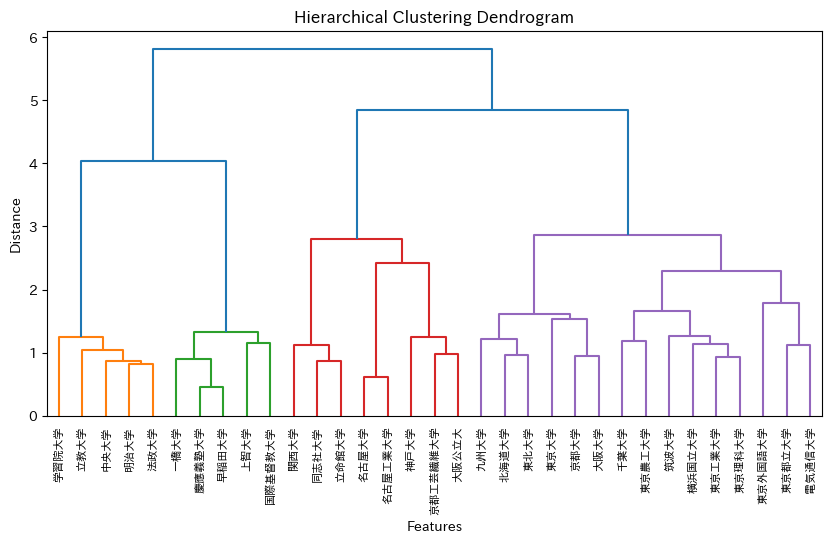

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

df_ratio_in_company_corr = df_ratio_in_company.T.corr()

distance_matrix = 1 - df_ratio_in_company_corr

# print(distance_matrix)

# 階層的クラスタリング
Z = linkage(distance_matrix, method='ward')  # ウォード法

# デンドログラムの描画
plt.figure(figsize=(10, 5))
dendrogram(
    Z, 
    labels=df_ratio_in_company_corr.index,
    leaf_rotation=90,
    color_threshold=0.5 * max(Z[:, 2]),
    )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [11]:
# クラスタ数を指定 5 or 7
n_clusters = 7
clusters = fcluster(
    Z,
    t=n_clusters, 
    criterion='maxclust'
    )
cluster_series = pd.Series(clusters, index=df_ratio_in_company_corr.index, name='cluster')
print(cluster_series.sort_values())

立教大学        1
中央大学        1
法政大学        1
明治大学        1
学習院大学       1
一橋大学        2
慶應義塾大学      2
国際基督教大学     2
早稲田大学       2
上智大学        2
関西大学        3
同志社大学       3
立命館大学       3
名古屋大学       4
名古屋工業大学     4
大阪公立大       5
京都工芸繊維大学    5
神戸大学        5
大阪大学        6
北海道大学       6
京都大学        6
東京大学        6
九州大学        6
東北大学        6
筑波大学        7
東京工業大学      7
東京都立大学      7
東京農工大学      7
東京理科大学      7
東京外国語大学     7
千葉大学        7
横浜国立大学      7
電気通信大学      7
Name: cluster, dtype: int32


In [12]:
df_ratio_in_company_with_label = df_ratio_in_company.join(cluster_series)
df_ratio_in_company_with_label_grouped = df_ratio_in_company_with_label.groupby('cluster')
df_ratio_in_company_with_label_grouped.sum().T.sort_values(by=6, ascending=False).head()

cluster,1,2,3,4,5,6,7
中外製薬,0.000000,0.081481,0.000000,0.000000,0.014815,0.555556,0.222222
ＮＴＴ（持株会社）,0.000000,0.095890,0.013699,0.013699,0.027397,0.520548,0.191781
住友化学,0.021583,0.122302,0.035971,0.021583,0.086331,0.496403,0.151079
第一三共,0.010101,0.111111,0.010101,0.000000,0.000000,0.474747,0.131313
旭化成グループ,0.011236,0.185393,0.067416,0.022472,0.039326,0.466292,0.123596


In [13]:
# plt.figure(figsize=(18, 12))
# df_ratio_corr = df_ratio_in_company_with_label.sort_values('cluster').drop('cluster', axis=1).T.corr()
# sns.heatmap(df_ratio_corr)
# sns.heatmap(df_ratio_corr, cmap= sns.color_palette('coolwarm', 16), annot=False, vmin=-1, vmax=1)
# plt.show()
# plt.close()


In [14]:
# df_size.T.sum()

In [15]:
# for univ in university_groups.keys():
#     plt.figure(figsize=(20, 12))
#     plt.title(univ)
#     tokyoichiko = pd.concat([df_size_grouped.get_group(univ).sum().drop('group'), df_ratio_grouped.get_group(univ).sum().drop('group')], axis=1)
#     tokyoichiko.columns=['size', 'ratio_in_company']

#     # tokyoichiko = tokyoichiko.drop('アクセンチュア')
#     # tokyoichiko = tokyoichiko.drop('みずほフィナンシャルグループ')
#     # tokyoichiko = tokyoichiko.drop('NTTデータグループ')

#     tokyoichiko = tokyoichiko[(tokyoichiko['size'] > tokyoichiko['size'].median()) & (tokyoichiko['ratio_in_company'] > tokyoichiko['ratio_in_company'].median())]
#     # tokyoichiko = tokyoichiko[(tokyoichiko['size'] > tokyoichiko['size'].quantile(3/4)) & (tokyoichiko['ratio_in_company'] > tokyoichiko['ratio_in_company'].quantile(3/4))]
#     # tokyoichiko = tokyoichiko[(tokyoichiko['size'] > 0) | (tokyoichiko['ratio_in_company'] > 0)].applymap(np.log)

#     ax = sns.scatterplot(data=tokyoichiko, x='size', y='ratio_in_company', s=100)
#     # インデックスを表示
#     for line in range(0, tokyoichiko.shape[0]):
#         ax.text(tokyoichiko['size'][line], tokyoichiko['ratio_in_company'][line], 
#                 tokyoichiko.index[line],
#                 horizontalalignment='center', 
#                 size='medium',
#                 color='black',
#             )
#         plt.xscale('log')
#         plt.yscale('log')

{1: ['中央大学', '学習院大学', '明治大学', '法政大学', '立教大学'], 2: ['一橋大学', '上智大学', '国際基督教大学', '慶應義塾大学', '早稲田大学'], 3: ['同志社大学', '立命館大学', '関西大学'], 4: ['名古屋大学', '名古屋工業大学'], 5: ['京都工芸繊維大学', '大阪公立大', '神戸大学'], 6: ['九州大学', '京都大学', '北海道大学', '大阪大学', '東京大学', '東北大学'], 7: ['千葉大学', '東京外国語大学', '東京工業大学', '東京理科大学', '東京農工大学', '東京都立大学', '横浜国立大学', '筑波大学', '電気通信大学']}


/tmp/ipykernel_16353/270372647.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_size["group"] = df_size.index.map(group_mapping)


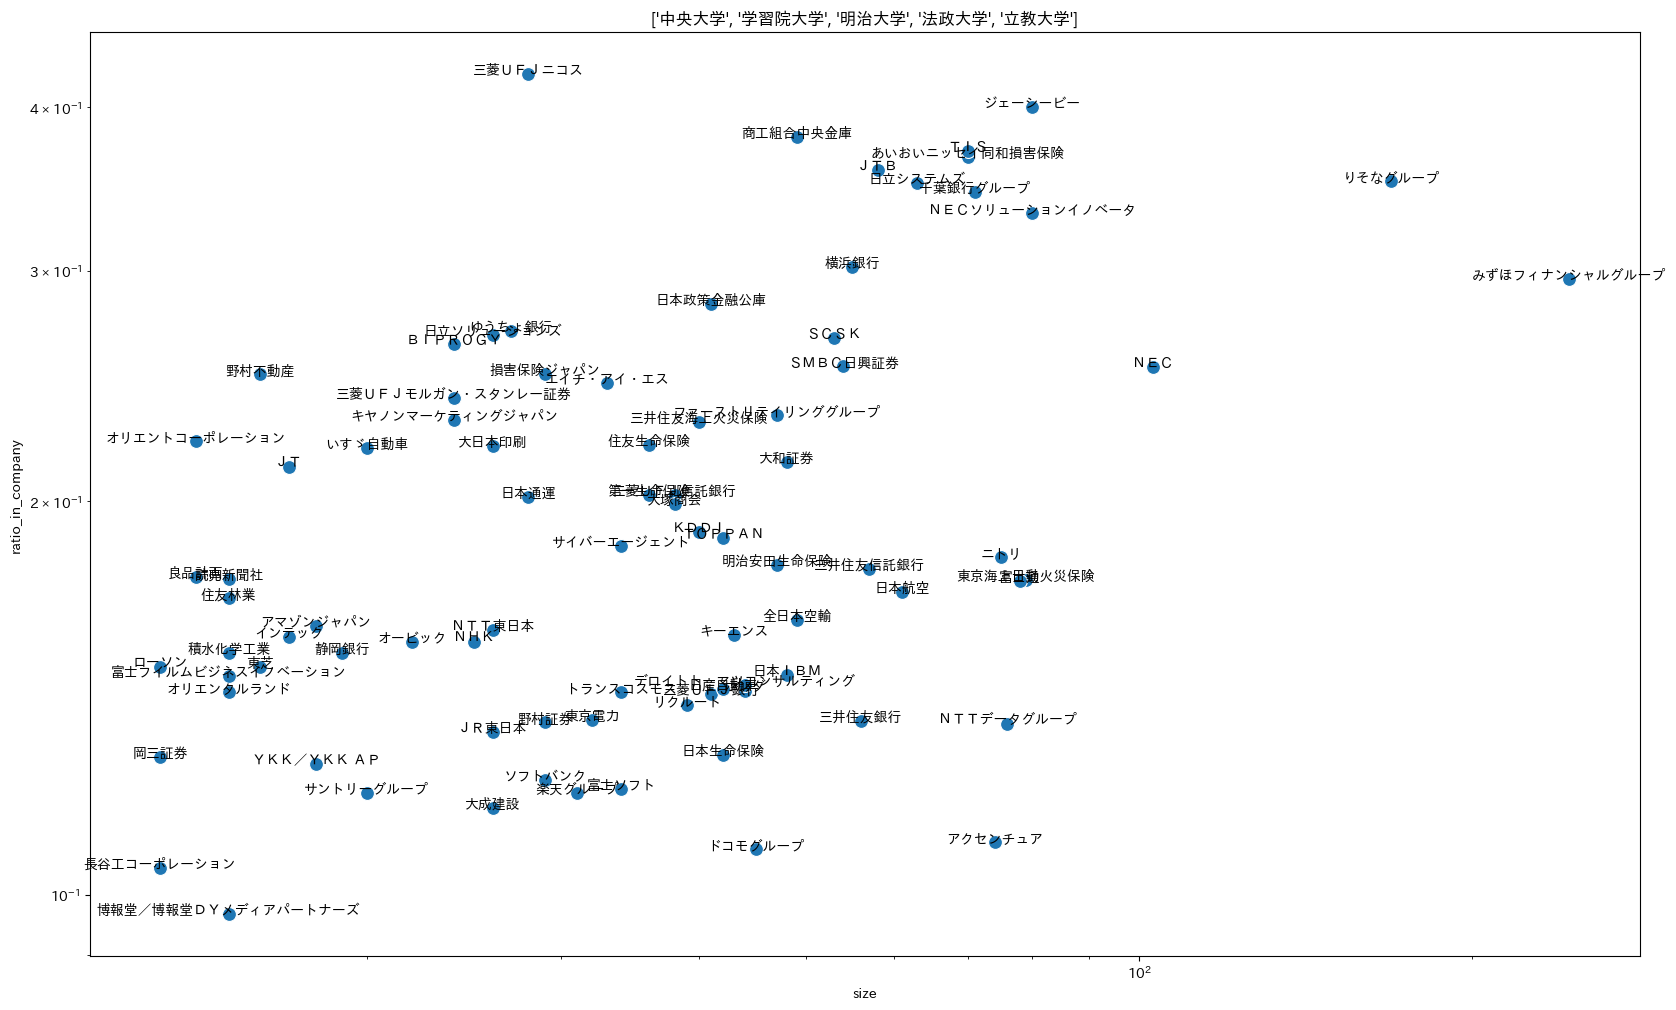

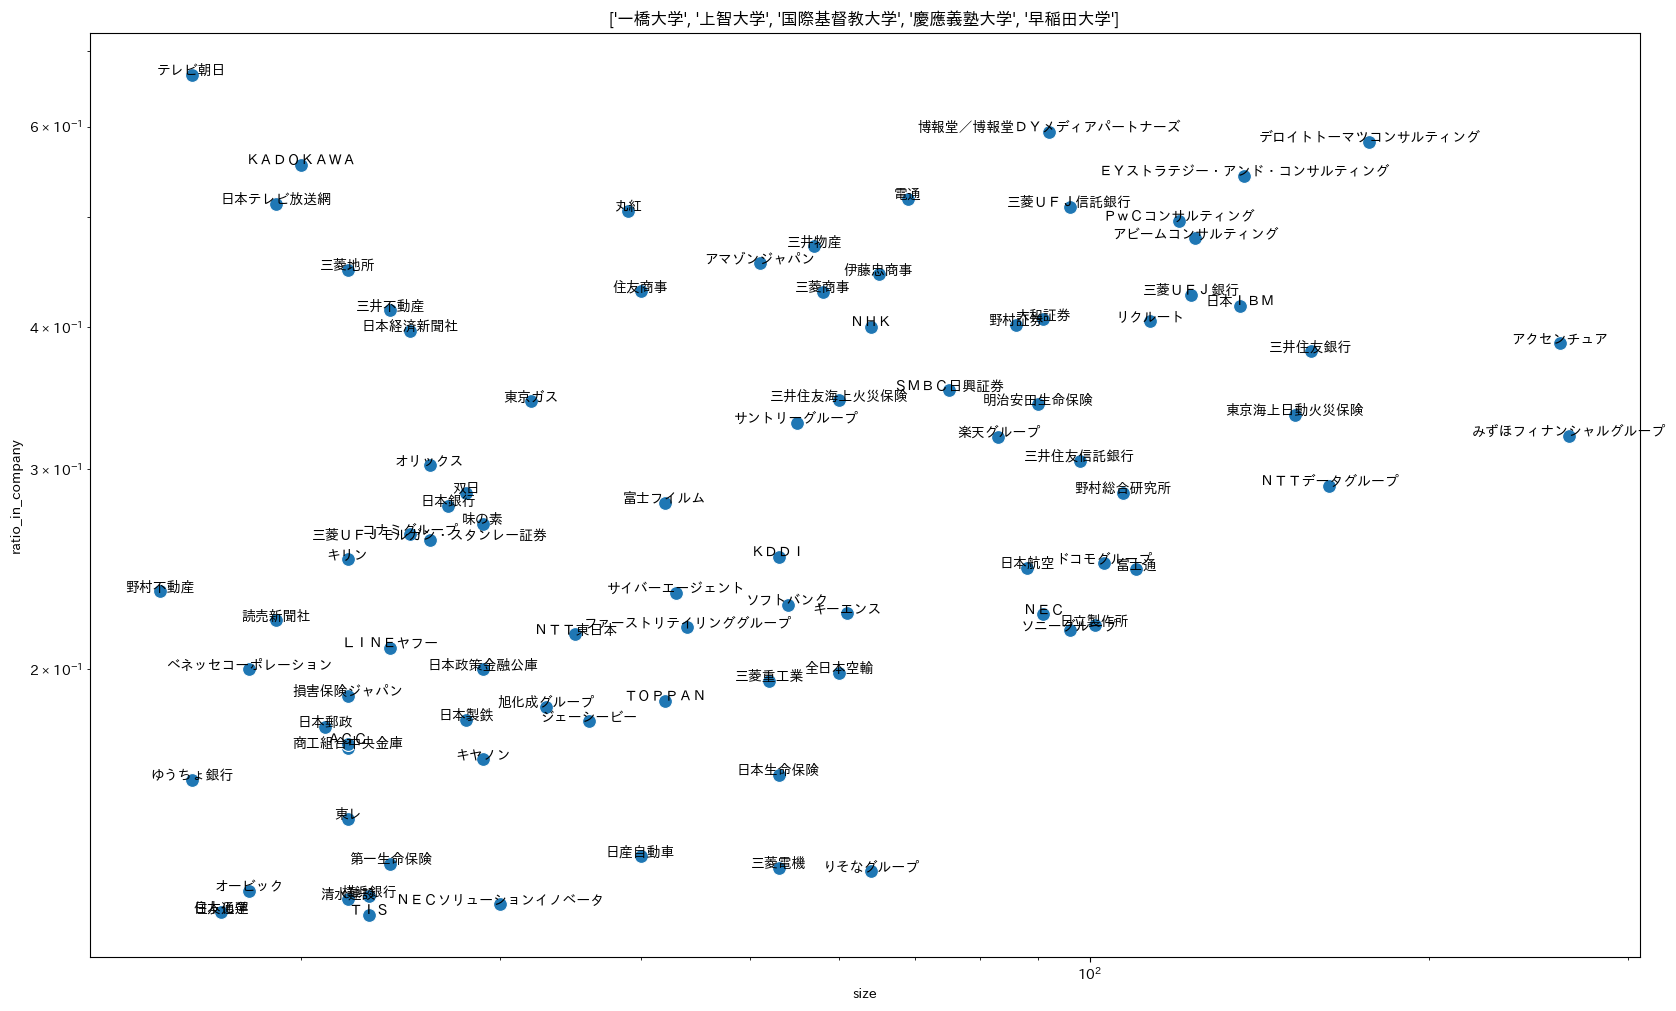

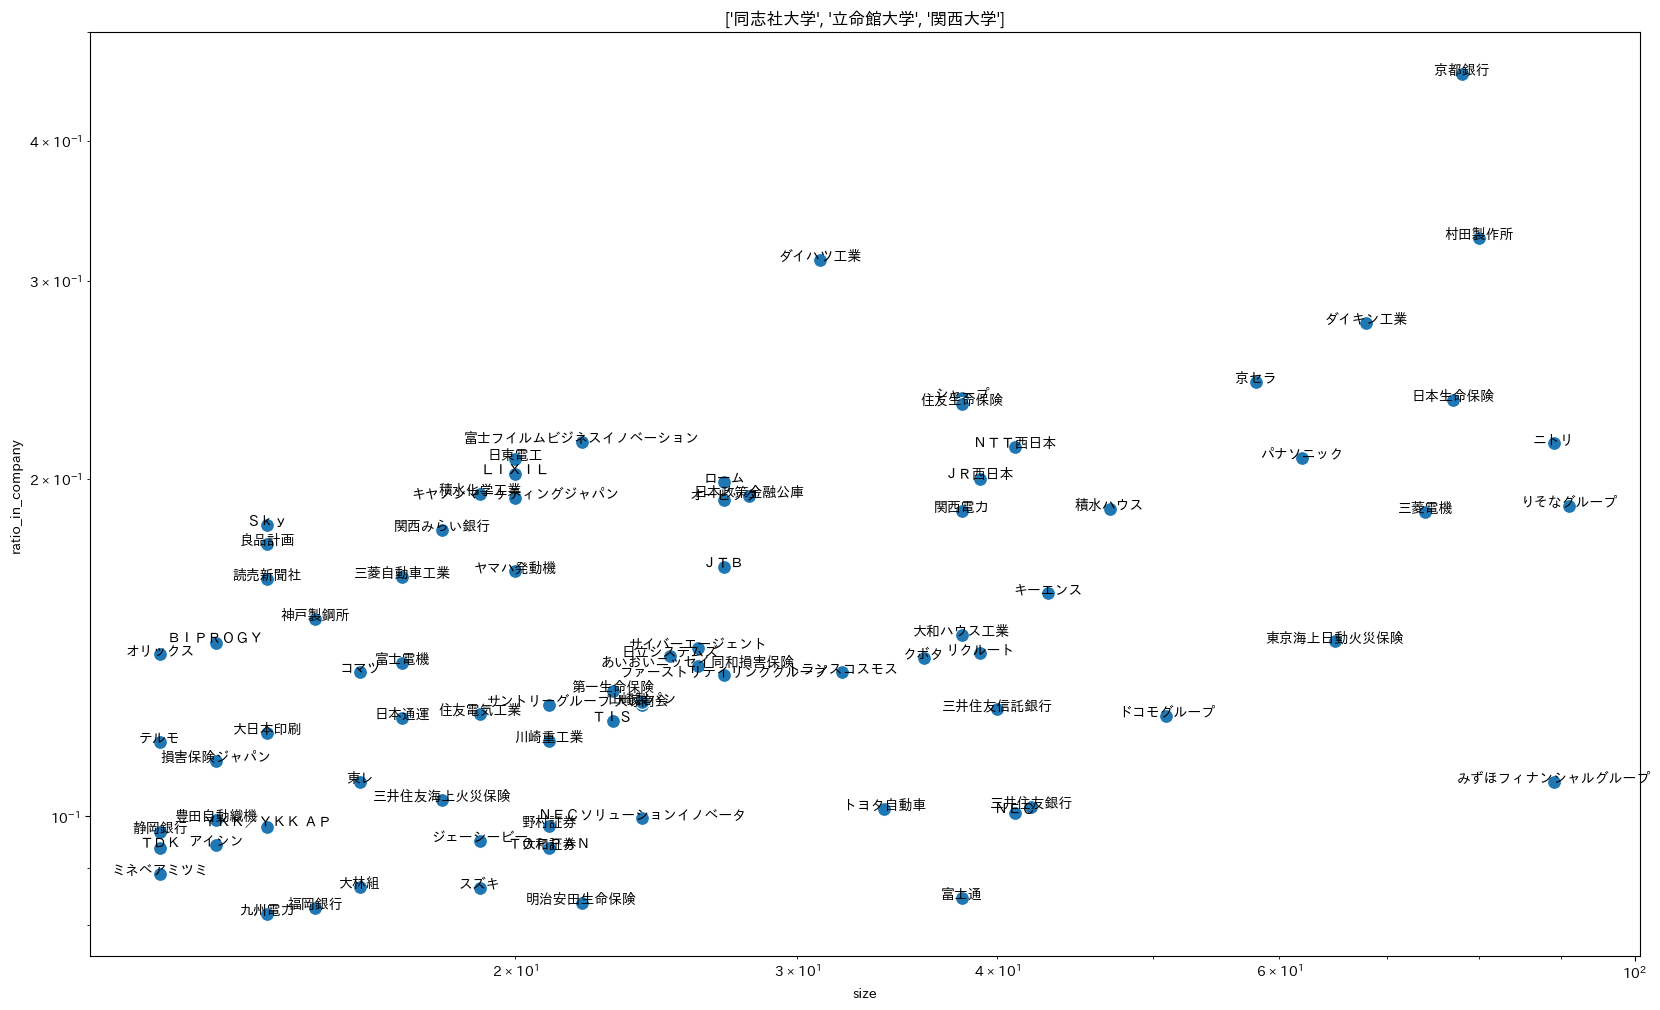

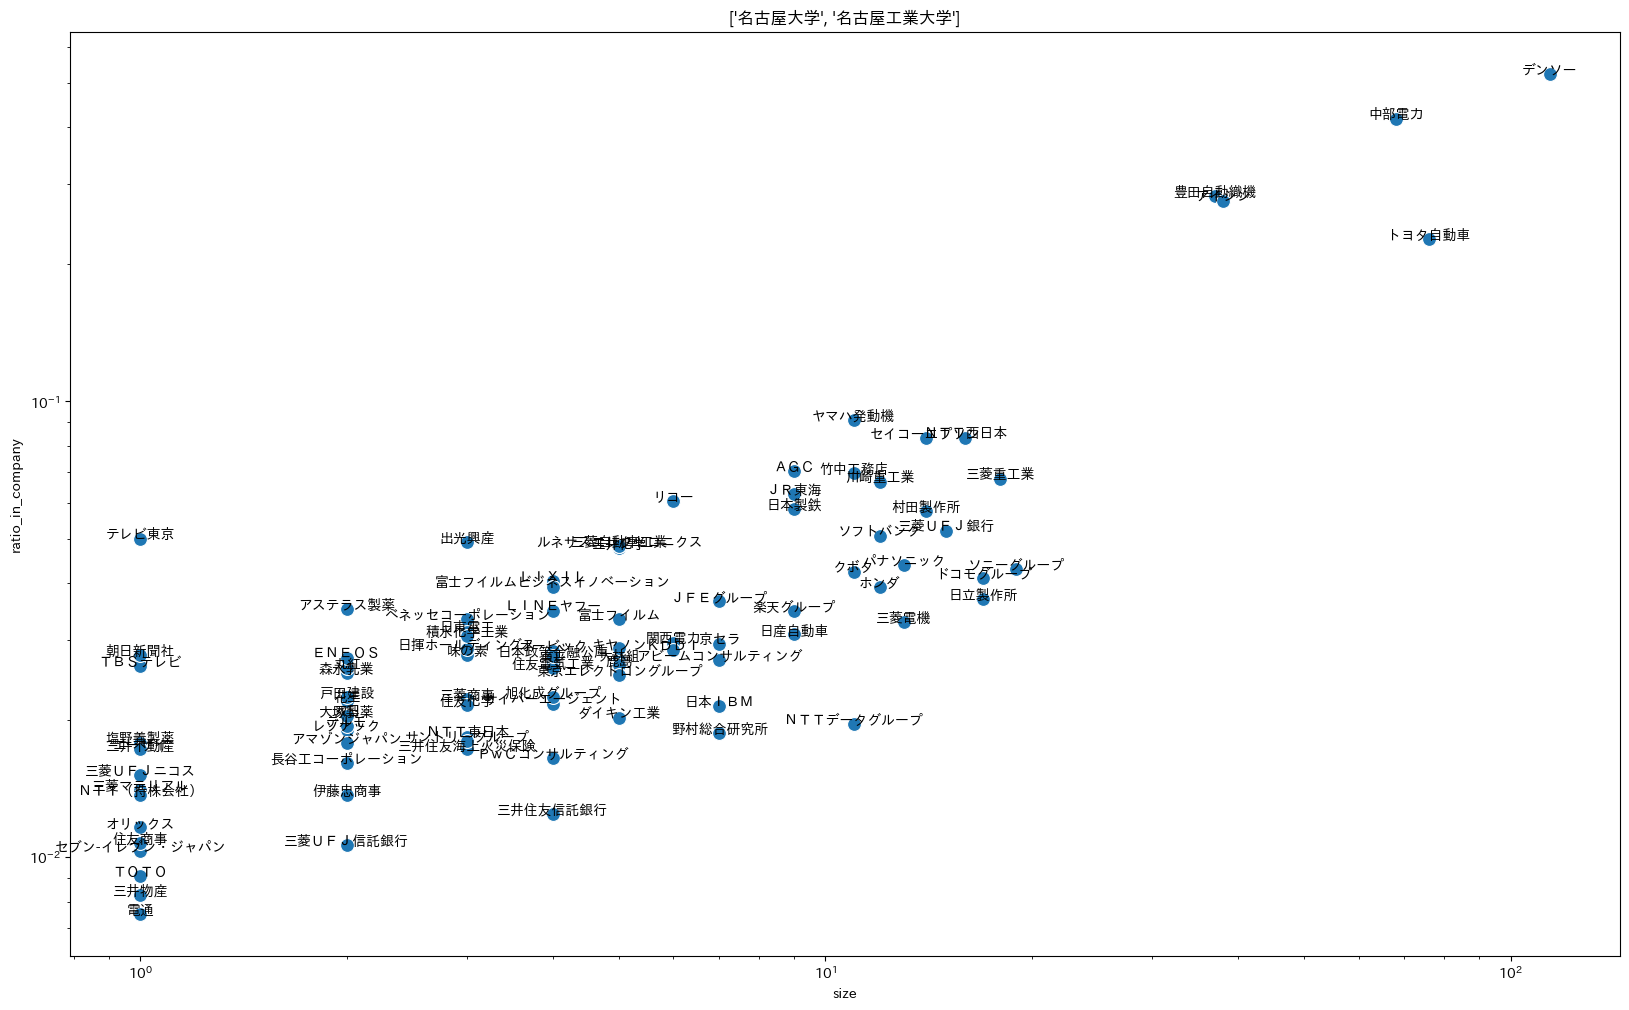

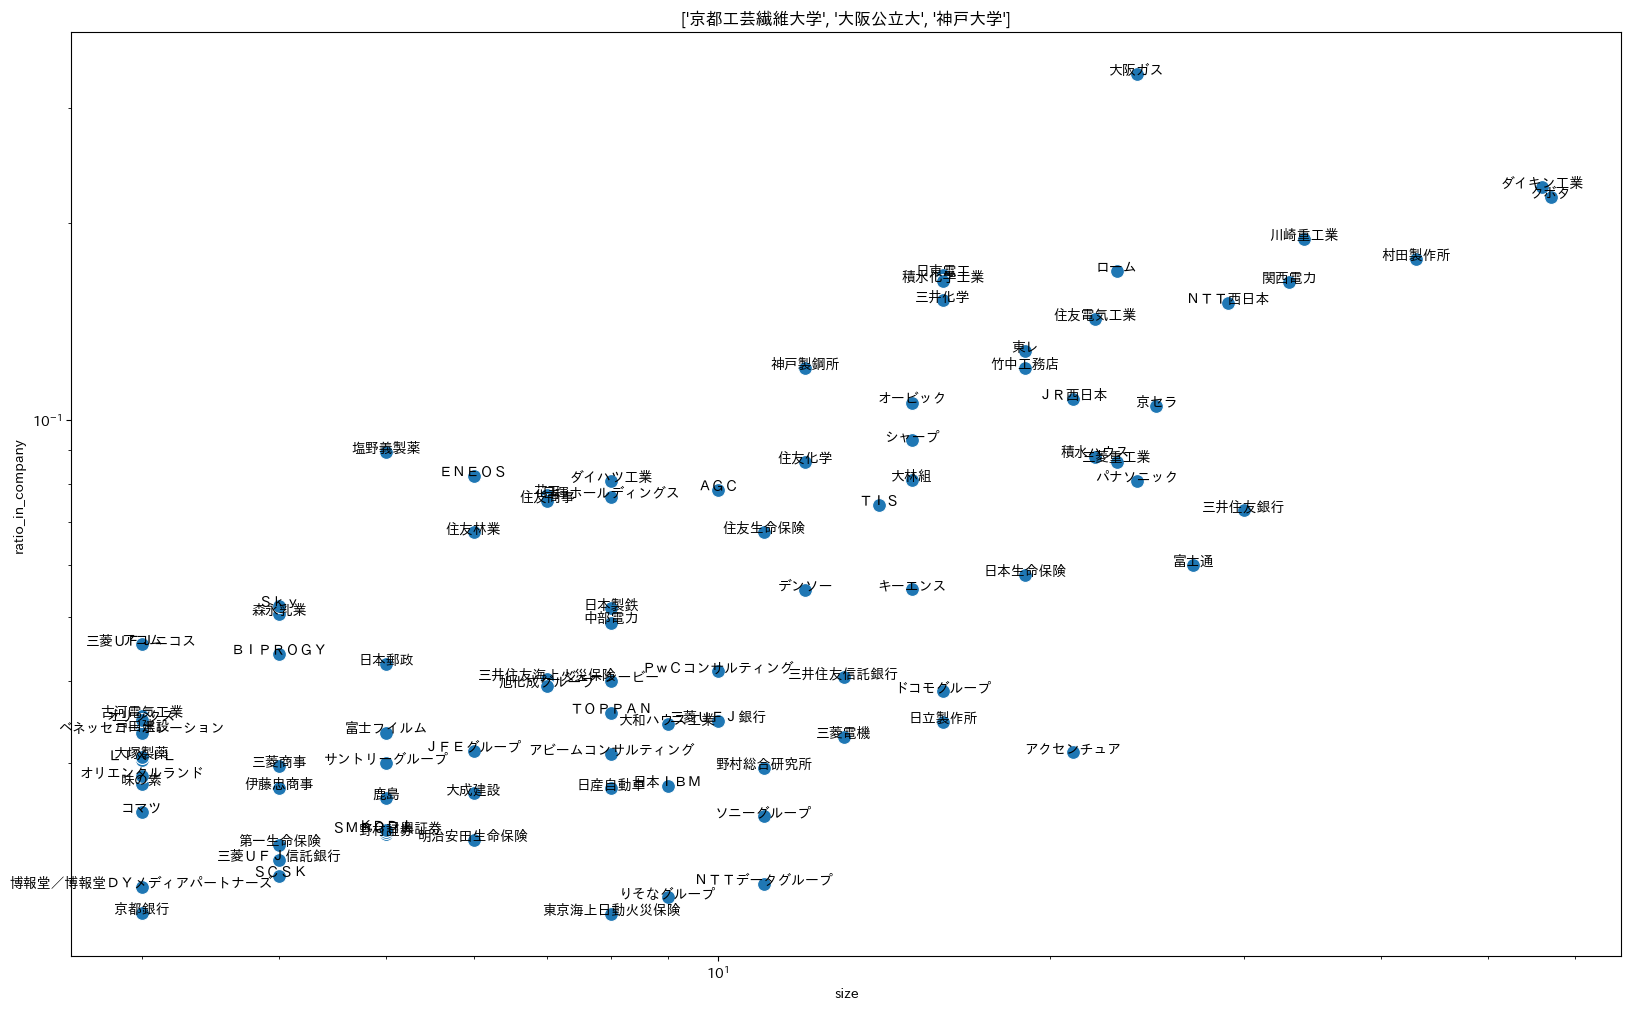

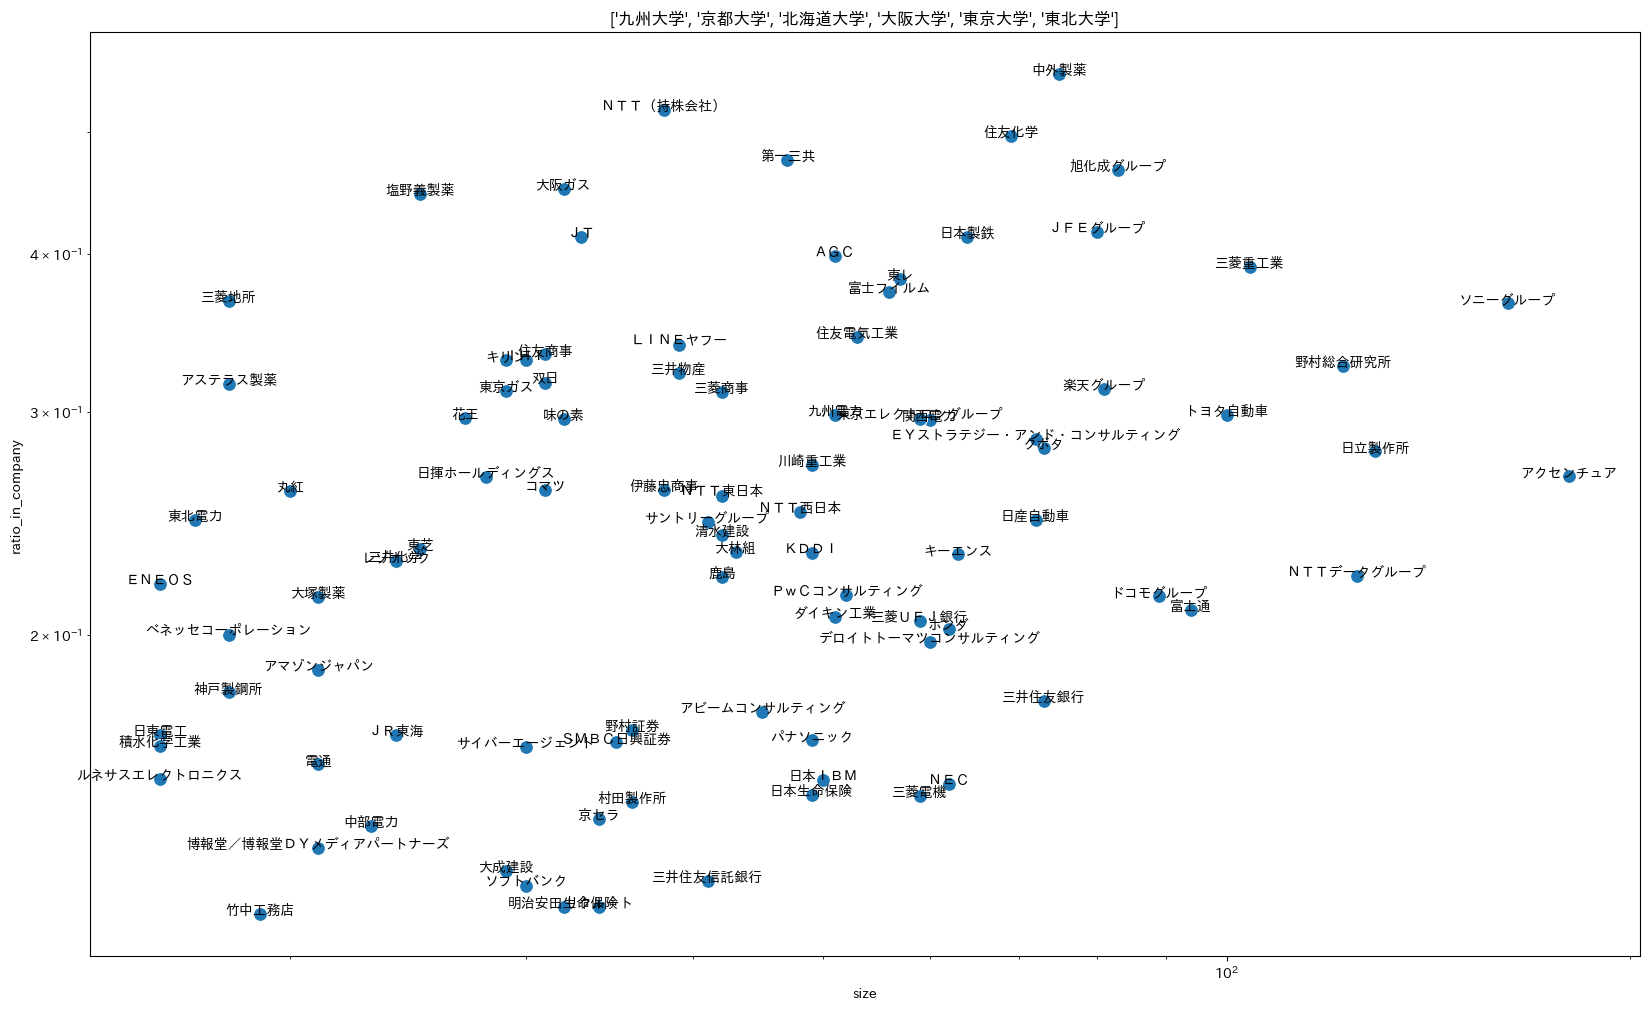

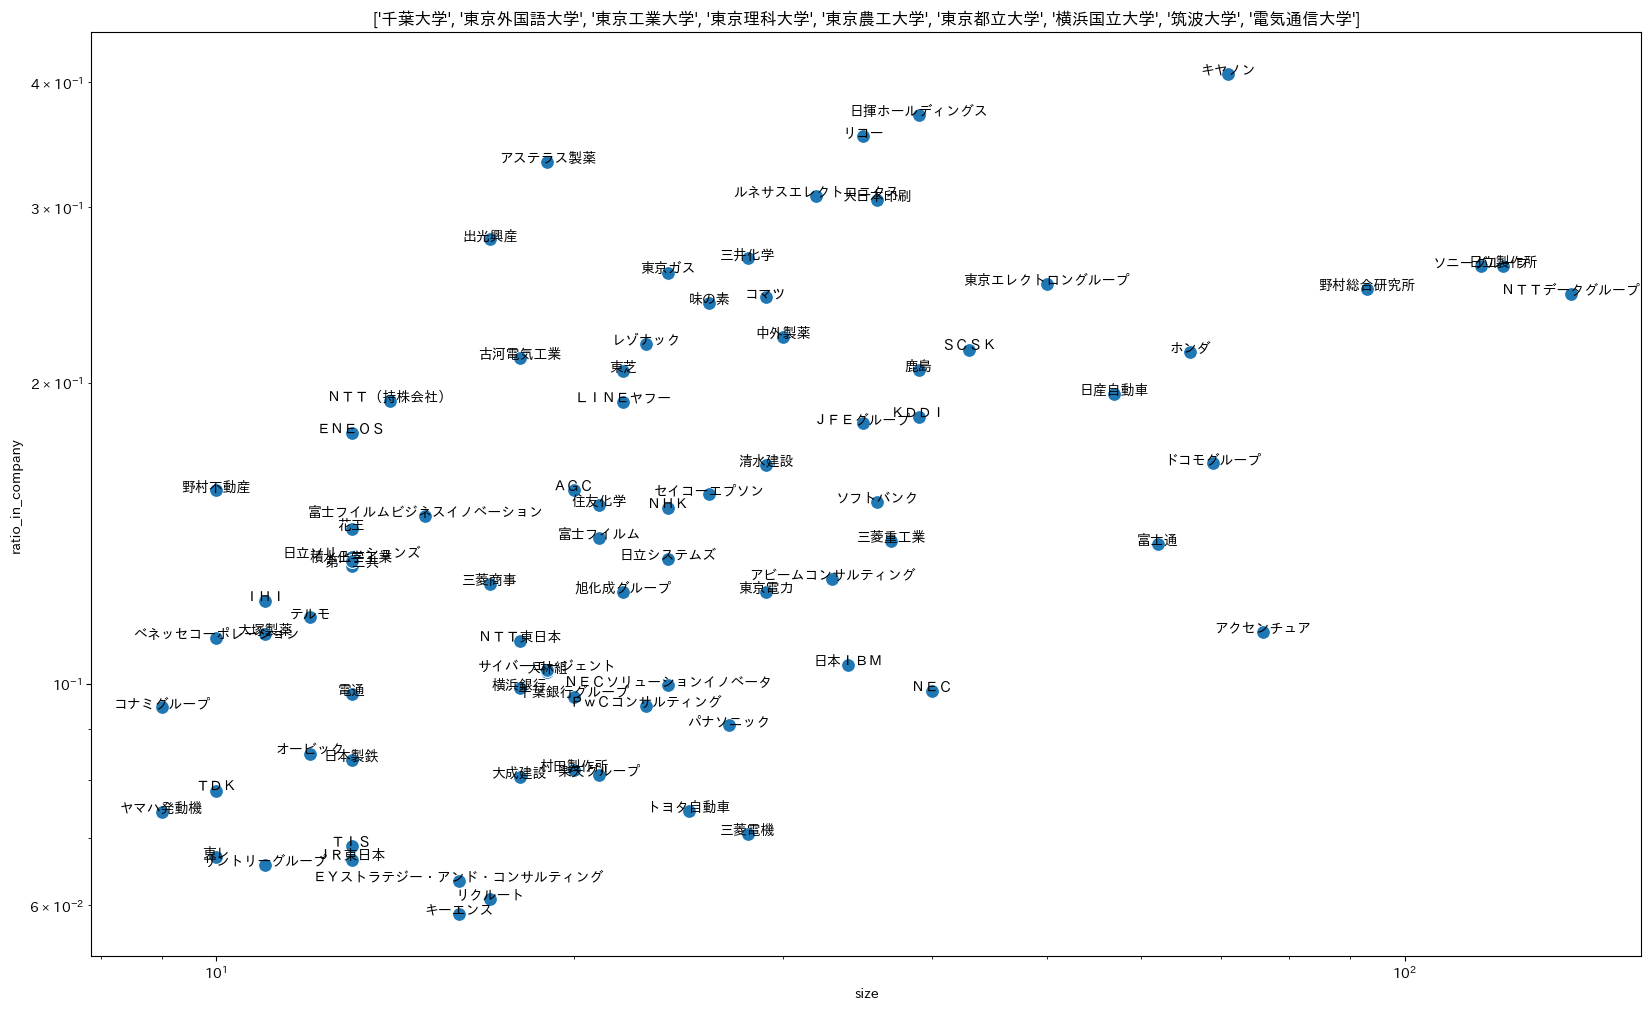

In [16]:
print(df_ratio_in_company_with_label_grouped.groups)

# 大学名からグループ名を逆引きする辞書を作成
group_mapping = {}
for key in df_ratio_in_company_with_label_grouped.groups:
    # print(key)
    for uni in df_ratio_in_company_with_label_grouped.groups[key]:
        group_mapping[uni] = key

df_size["group"] = df_size.index.map(group_mapping)
df_size_grouped = df_size.groupby("group")
df_size = df_size.drop("group", axis=1)
# print(df_size_grouped.sum())

df_ratio_in_company["group"] = df_ratio_in_company.index.map(group_mapping)
df_ratio_grouped = df_ratio_in_company.groupby("group")
df_ratio_in_company = df_ratio_in_company.drop("group", axis=1)
# print(df_ratio_grouped.sum())

for univ in df_ratio_in_company_with_label_grouped.groups:
    plt.figure(figsize=(20, 12))
    plt.title(list(df_ratio_in_company_with_label_grouped.groups[univ]))
    tokyoichiko = pd.concat([df_size_grouped.get_group(univ).sum().drop('group'), df_ratio_grouped.get_group(univ).sum().drop('group')], axis=1)
    tokyoichiko.columns=['size', 'ratio_in_company']

    # tokyoichiko = tokyoichiko.drop('アクセンチュア')
    # tokyoichiko = tokyoichiko.drop('みずほフィナンシャルグループ')
    # tokyoichiko = tokyoichiko.drop('NTTデータグループ')

    tokyoichiko = tokyoichiko[(tokyoichiko['size'] > tokyoichiko['size'].median()) & (tokyoichiko['ratio_in_company'] > tokyoichiko['ratio_in_company'].median())]
    # tokyoichiko = tokyoichiko[(tokyoichiko['size'] > tokyoichiko['size'].quantile(3/4)) & (tokyoichiko['ratio_in_company'] > tokyoichiko['ratio_in_company'].quantile(3/4))]
    # tokyoichiko = tokyoichiko[(tokyoichiko['size'] > 0) | (tokyoichiko['ratio_in_company'] > 0)].applymap(np.log)

    # print(univ)
    ax = sns.scatterplot(data=tokyoichiko, x='size', y='ratio_in_company', s=100)
    # インデックスを表示
    for line in range(0, tokyoichiko.shape[0]):
        ax.text(tokyoichiko['size'][line], tokyoichiko['ratio_in_company'][line], 
                tokyoichiko.index[line],
                horizontalalignment='center', 
                size='medium',
                color='black',
            )
        plt.xscale('log')
        plt.yscale('log')

In [17]:
# from sklearn.cluster import k_means
# from sklearn.cluster import KMeans
# from sklearn.cluster import kmeans_plusplus
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# inertias = []
# silhouette_scores = []
# s_scores = []
# db_scores = []
# ch_scores = []
# clusters = []
# k_range = range(2, int(len(df_ratio_in_company)))

# for i in k_range:
#     # Get initial centers using kmeans++
#     centers_init, _ = kmeans_plusplus(df_ratio_in_company.to_numpy(), n_clusters=i, random_state=0)
#     kmeans = KMeans(n_clusters=i, init=centers_init, n_init=1, random_state=0)
#     kmeans.fit(df_ratio_in_company)
    
#     clusters.append(kmeans.labels_)
#     inertias.append(kmeans.inertia_)
#     s_score = silhouette_score(df_ratio_in_company, kmeans.labels_)
#     s_scores.append(s_score)  
#     db_score = davies_bouldin_score(df_ratio_in_company, kmeans.labels_)
#     db_scores.append(db_score)    
#     ch_score = calinski_harabasz_score(df_ratio_in_company, kmeans.labels_)
#     ch_scores.append(ch_score)

# print(s_scores)
# plt.figure(figsize=(8, 5))
# plt.plot(k_range, s_scores)
# plt.grid()
# plt.show()
# plt.close()

# print(db_scores)
# plt.figure(figsize=(8, 5))
# plt.plot(k_range, db_scores)
# plt.grid()
# plt.show()
# plt.close()

# plt.figure(figsize=(8, 5))
# plt.plot(k_range, ch_scores)
# plt.grid()
# plt.show()
# plt.close()

# # 3 or 6 or 14

# n = 14

# print(clusters[n-2])

# cluster_series = pd.Series(clusters[n-2], index=df_ratio_corr.index, name='cluster')
# print(cluster_series.sort_values())

# df_ratio_in_company_with_label = df_ratio_in_company.join(cluster_series)
# df_ratio_in_company_with_label_grouped = df_ratio_in_company_with_label.groupby('cluster')
# df_ratio_in_company_with_label_grouped.sum().head()

In [18]:
university = pd.DataFrame(columns=['会社名', '就職者数'])
for key in df_by_company.keys():
    number = df_by_company[key][df_by_company[key]['大学名'].str.contains('東京理科大')]['就職者数']
    if len(number) == 0:
        continue
    # print(int(number))
    university.loc[len(university)] = [key, number.iat[0]]

print(len(university))
university['ratio_in_univ'] = university['就職者数'] / university['就職者数'].sum()

university.sort_values(by='就職者数', ascending=False).head(20)

128


,会社名,就職者数,ratio_in_univ
28,ＮＴＴデータグループ,51,0.053515
65,ソニーグループ,43,0.045121
126,日立製作所,36,0.037775
22,野村総合研究所,27,0.028332
121,富士通,25,0.026233
78,ＮＥＣソリューションイノベータ,24,0.025184
11,ドコモグループ,22,0.023085
26,キヤノン,20,0.020986
51,みずほフィナンシャルグループ,20,0.020986
87,日本ＩＢＭ,18,0.018888


/tmp/ipykernel_16353/1227619215.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')  # ウォード法


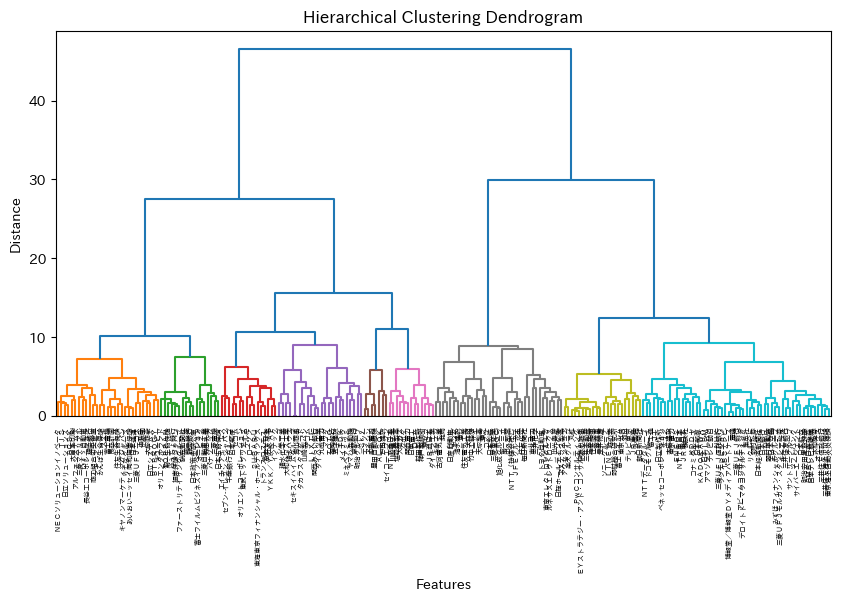

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

df_company_corr = df_ratio_in_company.corr()

distance_matrix = 1 - df_company_corr

# print(distance_matrix)

# 階層的クラスタリング
Z = linkage(distance_matrix, method='ward')  # ウォード法

# デンドログラムの描画
plt.figure(figsize=(10, 5))
dendrogram(
    Z, 
    labels=df_company_corr.index,
    leaf_rotation=90,
    color_threshold=0.2 * max(Z[:, 2]),
    )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

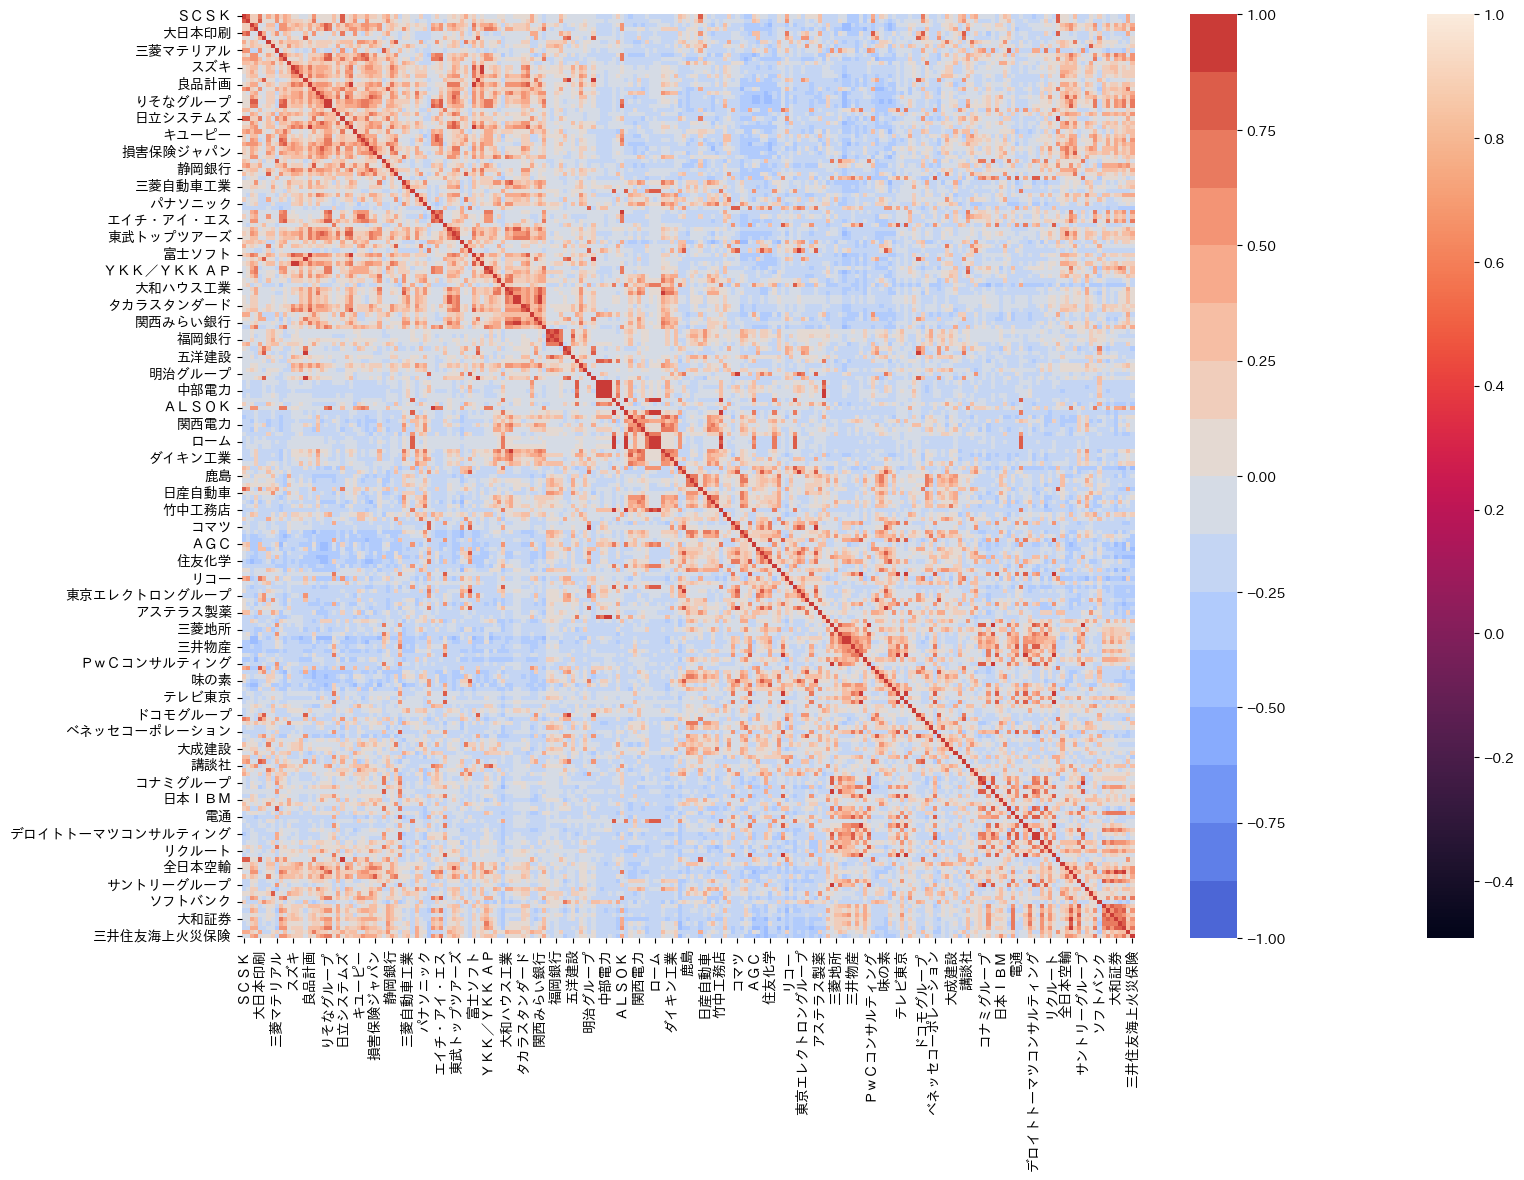

In [20]:
# クラスタ数を指定 5 or 7
# for i in range(30):
n_clusters = 120
clusters = fcluster(
    Z,
    t=n_clusters, 
    criterion='maxclust'
    )
cluster_series = pd.Series(clusters, index=df_company_corr.index, name='cluster')
# print(cluster_series.sort_values().head(20))
df_company_with_label = df_ratio_in_univ.T.join(cluster_series)
# df_company_with_label_grouped = df_company_with_label.groupby('cluster')
# df_company_with_label_grouped.sum().T.sort_values(by=6, ascending=False).head()
# df_company_with_label
plt.figure(figsize=(18, 12))
df_ratio_corr = df_company_with_label.sort_values('cluster').drop('cluster', axis=1).T.corr()
# print(df_ratio_corr)
sns.heatmap(df_ratio_corr)
sns.heatmap(df_ratio_corr, cmap= sns.color_palette('coolwarm', 16), annot=False, vmin=-1, vmax=1)
plt.show()
plt.close()

In [21]:
# df_ratio_univ = pd.DataFrame(index=company_names)
# print(df_ratio_company.index)
# for univ_name in university_list:
#     university = pd.DataFrame(columns=[univ_name])
#     # print(univ_name)
#     for company in df_by_company.keys():
#         size = df_by_company[company][df_by_company[company]['大学名'].str.contains(univ_name.replace('学', ''))]['就職者数']
#         if len(size) == 0:
#             continue
#         university.loc[company] = size.iat[0]
#     # print(university.index)

#     # print(len(university))
#     # university[univ_name] = university['就職者数'] / university['就職者数'].sum()
#     df_ratio_univ = df_ratio_univ.join(university[univ_name], how='outer')
#     # university.sort_values(by='就職者数', ascending=False).head(20)
# df_ratio_univ = df_ratio_univ.fillna(0)
# # df_ratio_univ

In [22]:
# df_ratio_univ = pd.DataFrame(index=university_list)
# print(df_ratio_univ.index)

# for company_name in df_by_company.keys():
#     company_series = pd.DataFrame(columns=[company_name])
#     for univ_name in university_list:
#         size = df_by_company[company_name][df_by_company[company_name]['大学名'].str.contains(univ_name.replace('学', ''))]['就職者数']
#         if len(size) == 0:
#             continue
#         company_series.loc[univ_name] = size.iat[0]
#     df_ratio_univ = df_ratio_univ.join(company_series[company_name], how='outer')
# df_ratio_univ = df_ratio_univ.fillna(0)
# df_ratio_univ